## P7
Małgorzata Kurcjusz-Gzowska 

In [4]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt

#### P7.18 Investigate with simulations [2,5]
- robustness of ER graph and scale-free networks to random failures,
- robustness of ER graph and scale-free networks to intentional attacks

In [3]:
def largest_component_fraction(G):
    if len(G) == 0:
        return 0.0
    gcc = max(nx.connected_components(G), key=len)
    return len(gcc) / len(G)


def make_graphs(n=2000, k=6, seed=None):
    p = k / (n - 1)
    G_er = nx.erdos_renyi_graph(n, p, seed=seed)
    G_sf = nx.barabasi_albert_graph(n, k // 2, seed=seed)
    return G_er, G_sf


def robustness_random_failures(G, fractions, repeats=1):
    n = len(G)
    results = np.zeros(len(fractions))
    for r in range(repeats):
        for i, f in enumerate(fractions):
            rem = int(f * n)
            nodes = list(G.nodes())
            to_remove = random.sample(nodes, rem)
            G_tmp = G.copy()
            G_tmp.remove_nodes_from(to_remove)
            results[i] += largest_component_fraction(G_tmp)
    return results / repeats


def robustness_targeted_attacks(G, fractions):
    n = len(G)
    results = []
    for f in fractions:
        rem = int(f * n)
        G_tmp = G.copy()
        for _ in range(rem):
            if len(G_tmp) == 0:
                break
            # węzeł o największym stopniu
            v = max(G_tmp.degree, key=lambda x: x[1])[0]
            G_tmp.remove_node(v)
        results.append(largest_component_fraction(G_tmp))
    return np.array(results)


def simulate(n=2000, k=6, fractions=None, repeats=5):
    if fractions is None:
        fractions = [i / 10 for i in range(10)]  # od 0 do 0.9 co 0.1

    er_rand_all = []
    sf_rand_all = []
    er_targ_all = []
    sf_targ_all = []

    for seed in range(repeats):
        G_er, G_sf = make_graphs(n, k, seed)

        er_rand_all.append(robustness_random_failures(G_er, fractions, repeats=1))
        sf_rand_all.append(robustness_random_failures(G_sf, fractions, repeats=1))

        er_targ_all.append(robustness_targeted_attacks(G_er, fractions))
        sf_targ_all.append(robustness_targeted_attacks(G_sf, fractions))

    er_rand = np.mean(er_rand_all, axis=0)
    sf_rand = np.mean(sf_rand_all, axis=0)
    er_targ = np.mean(er_targ_all, axis=0)
    sf_targ = np.mean(sf_targ_all, axis=0)

    return fractions, er_rand, sf_rand, er_targ, sf_targ


fractions, er_rand, sf_rand, er_targ, sf_targ = simulate()

print("fractions:", fractions)
print("ER random: ", np.round(er_rand, 3))
print("SF random: ", np.round(sf_rand, 3))
print("ER targeted: ", np.round(er_targ, 3))
print("SF targeted: ", np.round(sf_targ, 3))


fractions: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
ER random:  [0.997 0.995 0.99  0.982 0.964 0.936 0.884 0.736 0.26  0.04 ]
SF random:  [1.    1.    0.997 0.99  0.968 0.927 0.842 0.703 0.475 0.161]
ER targeted:  [0.997 0.99  0.968 0.896 0.127 0.007 0.002 0.002 0.002 0.005]
SF targeted:  [1.    0.935 0.623 0.008 0.002 0.002 0.001 0.002 0.002 0.005]


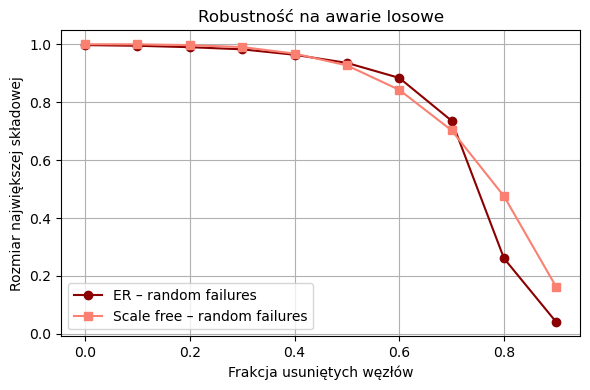

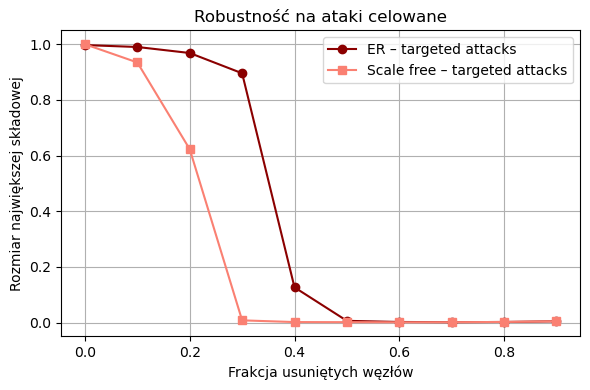

In [8]:
# random failures
plt.figure(figsize=(6,4))
plt.plot(fractions, er_rand, marker='o', label='ER – random failures',color="darkred")
plt.plot(fractions, sf_rand, marker='s', label='Scale free – random failures', color="salmon")
plt.xlabel('Frakcja usuniętych węzłów')
plt.ylabel('Rozmiar największej składowej')
plt.title('Robustność na awarie losowe')
plt.grid(True)
plt.legend()
plt.tight_layout()

# targeted attacks
plt.figure(figsize=(6,4))
plt.plot(fractions, er_targ, marker='o', label='ER – targeted attacks', color="darkred")
plt.plot(fractions, sf_targ, marker='s', label='Scale free – targeted attacks', color="salmon")
plt.xlabel('Frakcja usuniętych węzłów')
plt.ylabel('Rozmiar największej składowej')
plt.title('Robustność na ataki celowane')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

#### P7.19 Which type of graph is more robust on those threats? how to explain it? [0,5P]

scale free są bardziej odporne na awarie losowe, bo awarie trafiają zwykle mało połączone węzły,
ER są bardziej odporne na ataki celowane, bo brak hubów sprawia, że usunięcie węzłów o najwyższym stopniu nie niszczy tak mocno struktury.